In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
from scipy import integrate


In [4]:
data = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.1, 1.1, 1.3, 1.5, 1.5, 1.5, 1.8, 1.8, 1.9, 1.9, 2.1, 2.2, 2.2, 2.3, 2.5, 2.6, 2.6, 2.8, 2.8, 
        3.0, 3.2, 3.2, 3.3, 3.5, 3.6, 3.5, 3.6, 3.7, 3.9, 4.0, 4.1, 4.2, 4.4, 4.4, 4.6, 4.6, 4.7, 4.9, 4.9, 4.9, 5.0, 5.0, 5.0, 5.0])

In [5]:
def calculate_rolling_avgs(data, N): # NOTE: the first data point is the last one in the list
   r_avg = []
   temp_avg = []

   for i in range(data.size):
      if i < N-1:
         r_avg.append(data[i])
         temp_avg.insert(0, data[i])
      else:
         temp_avg.insert(0, data[i])
         temp_sum = sum(temp_avg[0:N])
         r_avg.append(temp_sum/N)
   return r_avg


In [6]:
x1 = np.arange(len(data))
x1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

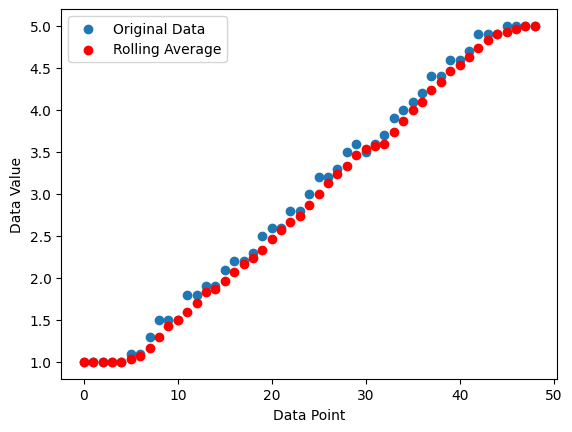

In [7]:
plt.scatter(x=x1, y=data, label='Original Data')
plt.xlabel("Data Point"); plt.ylabel("Data Value")
plt.scatter(x=x1, y=calculate_rolling_avgs(data=data, N=3), label='Rolling Average', color='red')
plt.legend()

In [8]:
a = [i for i in range(5)]
print(a)
print(a[0:3])
print(a[0:4])


[0, 1, 2, 3, 4]
[0, 1, 2]
[0, 1, 2, 3]


In [9]:
imu_data = np.array([-10.001, -10.392, -10.22, -9.596, -9.552, -10.269, -9.629,
             -10.155, -9.595, -9.811, -9.965, -10.461, -9.942, -10.36, -10.461,
               -10.25, -9.723, -10.277, -9.687, -9.984, -9.544, -10.032, -10.034, -10.28,
                 -10.407, -9.502, -9.601, -9.526, -10.302, -9.796, -10.379, -9.812, -10.207,
                   -10.32, -10.28, -9.628, -9.958, -10.253, -9.88, -10.039, -10.445, -9.773,
                     -10.055, -9.572, -10.369, -10.125, -9.56, -10.027, -10.21, -10.34])

In [10]:
x = np.arange(imu_data.size)

calculate_rolling_avgs(imu_data, 5)

[-10.001,
 -10.392,
 -10.22,
 -9.596,
 -9.952200000000001,
 -10.005799999999999,
 -9.8532,
 -9.8402,
 -9.84,
 -9.8918,
 -9.831,
 -9.9974,
 -9.9548,
 -10.1078,
 -10.237799999999998,
 -10.294799999999999,
 -10.1472,
 -10.2142,
 -10.0796,
 -9.9842,
 -9.843,
 -9.9048,
 -9.8562,
 -9.9748,
 -10.0594,
 -10.050999999999998,
 -9.9648,
 -9.8632,
 -9.867600000000001,
 -9.7454,
 -9.9208,
 -9.963,
 -10.0992,
 -10.102799999999998,
 -10.1996,
 -10.0494,
 -10.0786,
 -10.0878,
 -9.9998,
 -9.951600000000001,
 -10.115,
 -10.078,
 -10.0384,
 -9.9768,
 -10.0428,
 -9.978799999999998,
 -9.936200000000001,
 -9.930600000000002,
 -10.058200000000001,
 -10.0524]

-9.831

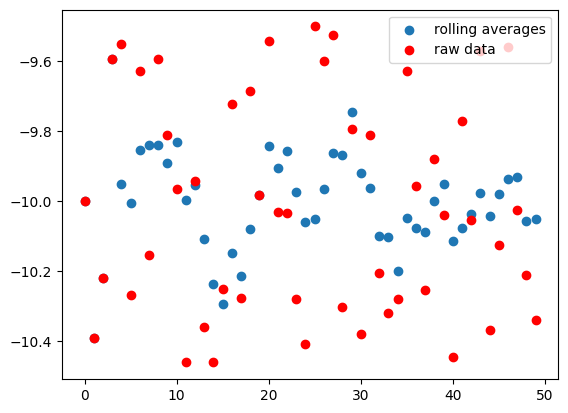

In [11]:
plt.scatter(x=x, y=calculate_rolling_avgs(N=5, data=imu_data), label='rolling averages')
plt.scatter(x=x, y=imu_data, color='red', label='raw data')
plt.legend()

a = calculate_rolling_avgs(N=5, data=imu_data)
a[10]

In [12]:
noisy_lidar = np.array([4.546, 4.5, 4.567, 4.508, 4.602, 4.504,
                        4.666, 4.662, 4.624, 4.518, 4.743, 4.748,
                        4.775, 4.627, 4.642, 4.747, 4.566, 4.551,
                        4.536, 4.622, 4.676, 4.557, 4.733, 4.532, 
                        4.667, 4.732, 4.634, 4.7, 4.764, 4.602, 4.644, 
                        4.77, 4.624, 4.717, 4.538, 4.502, 4.798, 4.772, 
                        4.537, 4.586, 4.543, 4.563, 4.675, 4.713, 4.509, 
                        4.678, 4.729, 4.782, 4.722, 4.579
])
"FOR QUESTION 2D WHICH TALKS ABOUT INTRODUCING A BIAS TO THE DATASETS"
# noisy_lidar1 = np.array([i + 0.36 for i in noisy_lidar1])

'FOR QUESTION 2D WHICH TALKS ABOUT INTRODUCING A BIAS TO THE DATASETS'

In [13]:
5 - noisy_lidar.mean()

0.36335999999999924

In [14]:
import math
from math import sqrt
PI = 3.141592653589793238462


def gaussian(x, mu, var):
  first_frac = 1/(sqrt(2*PI*var))
  expo_num = -(x-mu)**2
  expo_denom = 2*var
  return first_frac * ((math.e)**(expo_num/expo_denom))

In [15]:
mu_q2 = noisy_lidar.mean()
var_q2 = noisy_lidar.var()

print(f"Mean: {mu_q2}, Variance: {var_q2}, Standard Deviation: {noisy_lidar.std()}")
integrate.quad(gaussian, 4.9, 5.1, args=(mu_q2, var_q2))

Mean: 4.636640000000001, Variance: 0.008183150400000005, Standard Deviation: 0.09046076718666499


(0.0017993904011035986, 1.9977246535947108e-17)

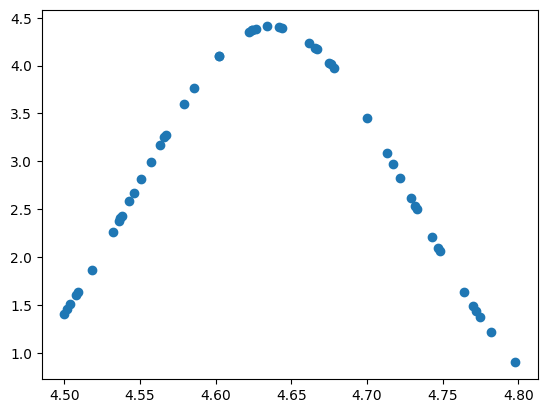

In [16]:
plt.scatter(x=noisy_lidar, y=gaussian(noisy_lidar, noisy_lidar.mean(), noisy_lidar.var()))


In [17]:
integrate.quad(gaussian, 4.49, mu_q2, args=(mu_q2, var_q2))

from scipy import stats


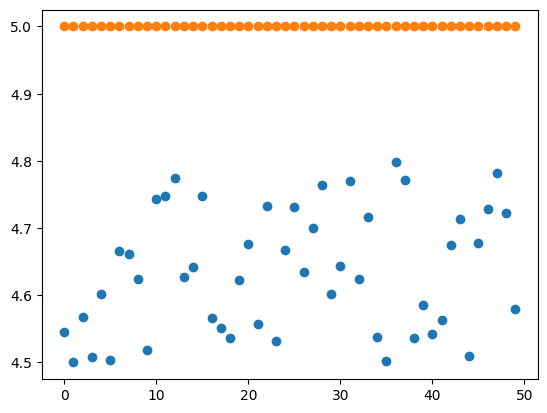

In [18]:
plt.scatter(x=np.arange(len(noisy_lidar)), y=noisy_lidar)
plt.scatter(x=np.arange(len(noisy_lidar)), y=[5 for i in range(len(noisy_lidar))])


### Creating a convolution with two lists ###

In [2]:
def convolution(f: list, g: list) -> list:
   result = []
   kernel = g[::-1]
   result.append(f[0] * g[0])
   if len(f) > 0 and len(g) > 0:
      for i in range(1, len(f)):
         
      

   return result

In [14]:
f = np.array([28, 24, 16, 32, 20, 24])
g = np.array([1/8, 1/8, 2/3, 2/3])
np.convolve(f, g,)

array([ 3.5       ,  6.5       , 23.66666667, 40.66666667, 33.16666667,
       37.5       , 37.66666667, 29.33333333, 16.        ])

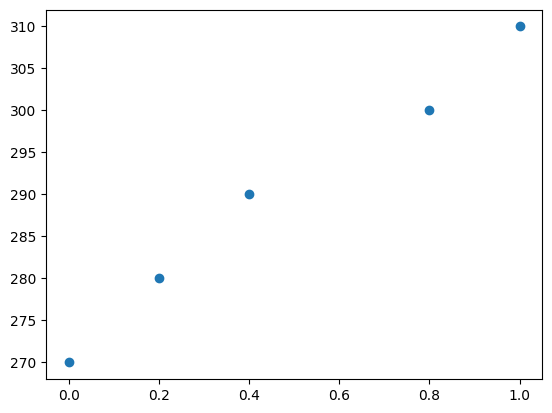

In [13]:
data = np.array([(0.0, 270), (0.2, 280), (0.4, 290), (0.8, 300), (1.0, 310)])
time = [tuple[0] for tuple in data]
x = [tuple[1] for tuple in data]
plt.scatter(time, x)

### PID Problems


In [28]:
P = (320 - 300) * 1
I = 0.5 * ((320 - 275) + (320 - 350) + (320 - 300))
D = 0.5 * ((320 - 300) - (320 - 350))
P + I + D

62.5

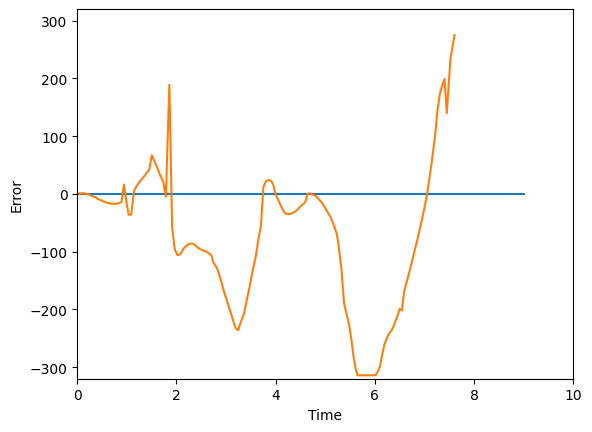

In [10]:
plt.xlabel("Time")
plt.ylabel("Error")
plt.xlim(0, 10)
plt.ylim(-320, 320)
plt.plot([i for i in range(10)], [0 for i in range(10)]) 

x = [0.019689299166202545, 0.03937859833240509, 0.1393785998225212, 
     0.19733089953660965, 0.25274429842829704, 0.3096344992518425, 
     0.36778559908270836, 0.41979509964585304, 0.4735123999416828, 
     0.5277296006679535, 0.5823934003710747, 0.641524501144886, 
     0.6922756023705006, 0.7409686036407948, 0.7926800027489662, 
     0.8442436009645462, 0.8911773003637791, 0.9396230019629002, 0.9872574023902416, 1.035671103745699, 1.0871610045433044, 1.1430598050355911, 1.1911305040121078, 1.247908804565668, 1.3024207055568695, 1.353520106524229, 1.4052888080477715, 1.4537324085831642, 1.5019160099327564, 1.5537301115691662, 1.604144211858511, 1.6449753120541573, 1.6903084106743336, 1.7364171110093594, 1.7862696126103401, 1.8563271090388298, 1.9127474091947079, 1.9652133099734783, 2.021129608154297, 2.083137109875679, 2.1387040093541145, 2.2128068059682846, 2.269434005022049, 2.31994990631938, 2.3687254078686237, 2.41881300881505, 2.46405490860343, 2.513614408671856, 2.561873510479927, 2.6099254116415977, 2.6560600101947784, 2.70230121165514, 2.744345311075449, 2.8216072134673595, 2.8608976118266582, 2.9037860110402107, 2.943775411695242, 2.987093113362789, 3.0288396142423153, 3.0720742158591747, 3.1131292171776295, 3.1547402180731297, 3.197286918759346, 3.2431791201233864, 3.293075818568468, 3.3625164218246937, 3.414437722414732, 3.4739432223141193, 3.533313922584057, 3.592586424201727, 3.644710123538971, 3.702131923288107, 3.7524274215102196, 3.802900020033121, 3.8488942198455334, 3.9076241180300713, 3.950854118913412, 3.9962223172187805, 4.06085641682148, 4.107110917568207, 4.147831216454506, 4.1908304169774055, 4.271905615925789, 4.3157964162528515, 4.356815814971924, 4.399837713688612, 4.440029311925173, 4.481330212205648, 4.520613010972738, 4.561966609209776, 4.6001430079340935, 4.6441997066140175, 4.684347905218601, 4.726907003670931, 4.769665405154228, 4.814621705561876, 4.855229403823614, 4.89929810538888, 4.93970650434494, 4.979818806052208, 5.021276406943798, 5.0634498074650764, 5.103924307972193, 5.1460420079529285, 5.186953209340572, 5.232254110276699, 5.272535711526871, 5.326445110142231, 5.37927370890975, 5.479273710399866, 5.529010109603405, 5.568391609936953, 5.607948008924723, 5.650842510163784, 5.698948610574007, 5.742297109216452, 5.783488109707832, 5.826426308602095, 5.869570408016443, 5.914784606546164, 5.958717208355665, 6.00784120708704, 6.053109306842089, 6.103579007089138, 6.147583808749914, 6.192092809826136, 6.235782109200954, 6.2823100090026855, 6.322437509894371, 6.368325211107731, 6.411209512501955, 6.45681531354785, 6.50037981197238, 6.544566910713911, 6.589399311691523, 6.6364342123270035, 6.682338614016771, 6.724013812839985, 6.765443313866854, 6.806194715201855, 6.849300716072321, 6.887749217450619, 6.929806318134069, 6.9697611182928085, 7.012888517230749, 7.054408218711615, 7.094013717025518, 7.134826015681028, 7.175939116626978, 7.2168665155768394, 7.256283015012741, 7.31002901494503, 7.357503414154053, 7.404368914663792, 7.449012614786625, 7.523392014205456, 7.5647775158286095, 7.605571016669273]

errors = [1, 1, 1, 0, -2, -4, -6, -9, -11, -13, -15, -16, -17, -17, -17, -16, -14, 16, -12, -36, -36, 5, 13, 20, 26, 31, 37, 43, 67, 57, 47, 38, 29, 20, -5, 189, -59, -96, -106, -104, -95, -89, -86, -86, -88, -92, -95, -97, -99, -100, -103, -106, -119, -129, -140, -152, -165, -177, -188, -200, -211, -223, -233, -236, -223, -207, -185, -161, -134, -111, -82, -56, 12, 22, 24, 23, 16, -1, -12, -21, -28, -34, -35, -34, -32, -30, -27, -23, -20, -17, -13, 0, 1, 0, -2, -4, -8, -12, -16, -22, -28, -34, -40, -48, -58, -69, -92, -131, -190, -226, -254, -281, -301, -314, -314, -314, -314, -314, -314, -314, -314, -314, -309, -298, -278, -261, -251, -242, -238, -231, -221, -211, -199, -202, -169, -154, -139, -125, -111, -96, -82, -67, -52, -36, -18, 1, 24, 48, 76, 103, 141, 173, 188, 199, 140, 234, 255, 275]

plt.plot(x, errors)